In [1]:
from load_Stanford_data import get_mat_voltage, cycle_info_visualization
from data_preprocessing import Stanford_Degradation_Dataset, load_Stanford_data, load_Stanford_filtered_data
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

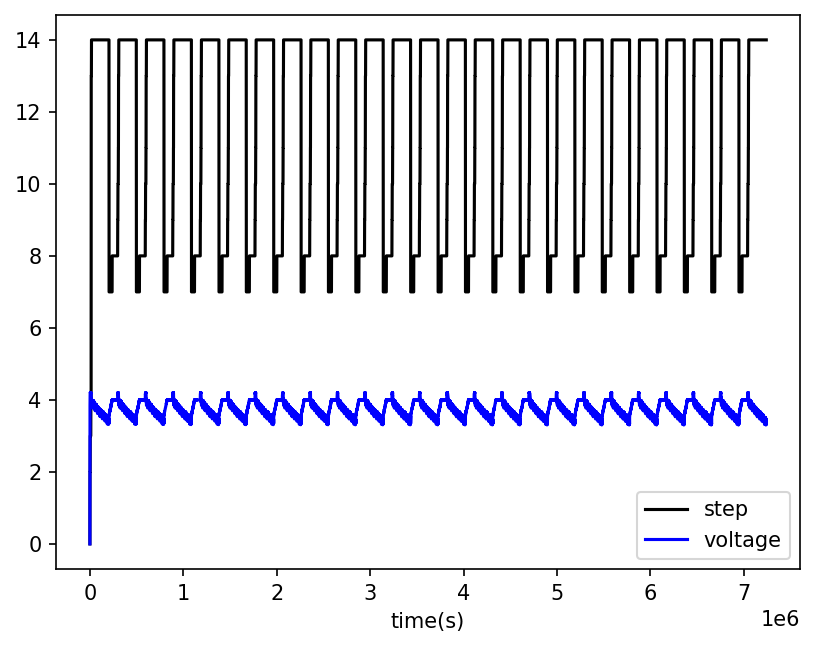

In [2]:
v, t, s = get_mat_voltage('Stanford_Dataset/Cycling_1/W8.mat', plot=True)

* 一筆Cycling資料內的數據會重複多次充放電過程
* step 用於標註電池目前的運行狀態，例如step=14代表電池在UDDS放電階段
* 以上資料重複了約20幾次的充電及UDDS放電程序


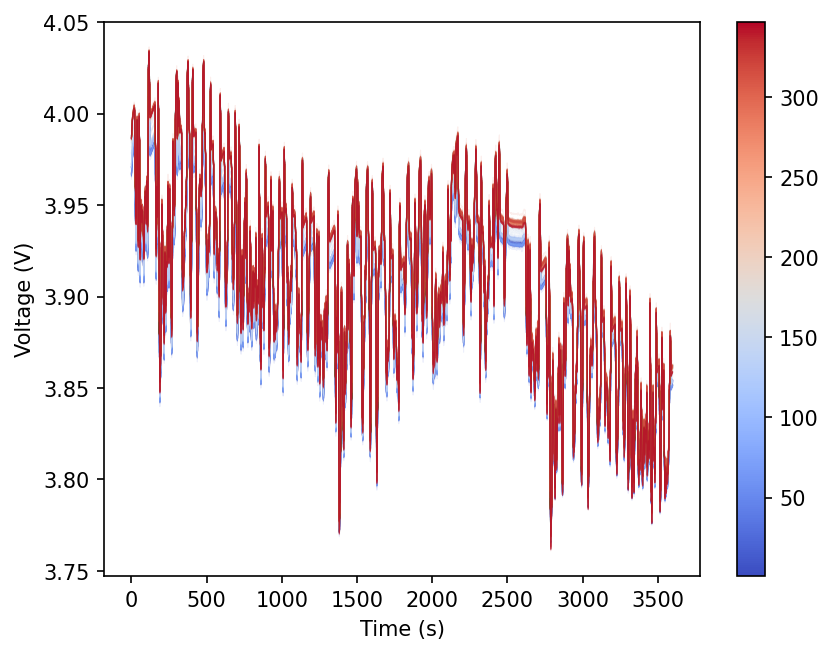

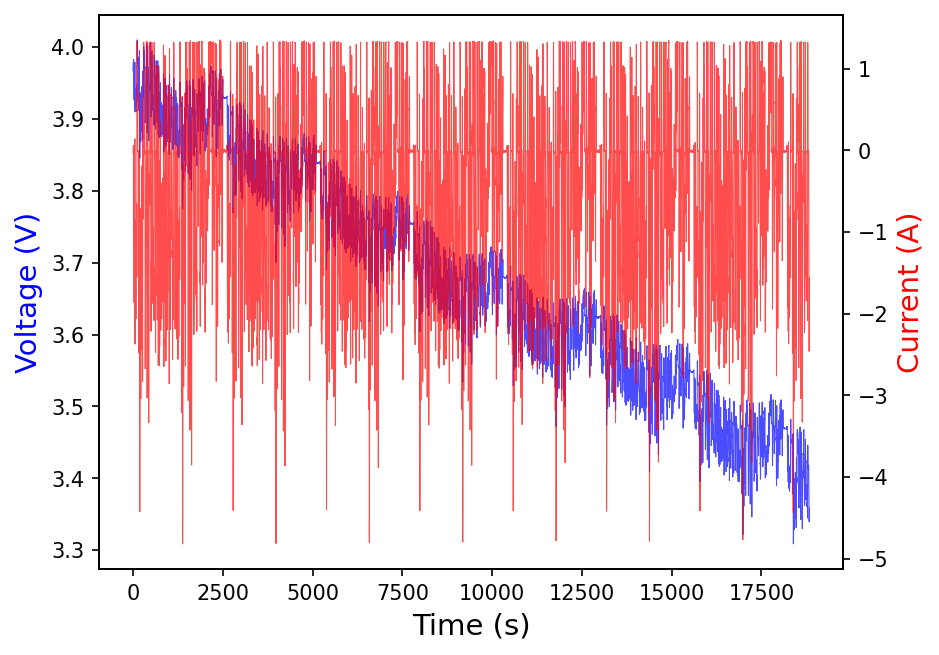

In [3]:
cycle_info_visualization('Stanford_Dataset/discharge_info', 'W8', mode='full') # 繪製每循環首3600sec的數據
cycle_info_visualization('Stanford_Dataset/discharge_info', 'W8', mode='partial', cycle=10) # 一循環內的完整電壓電流曲線

* 輸入到模型的樣本以3600sec內的電壓電流片段為單位(圖一是3600sec電壓片段隨循環的變化)
* 3600sec片段是採樣自Cycling資料的其中一筆小循環(圖二展示完整的小循環)

in filtered data, n_samples = 6, array shape of first sample = (179, 2, 3600)
in original data, n_samples = 6, array shape of first sample = (179, 2, 3600)


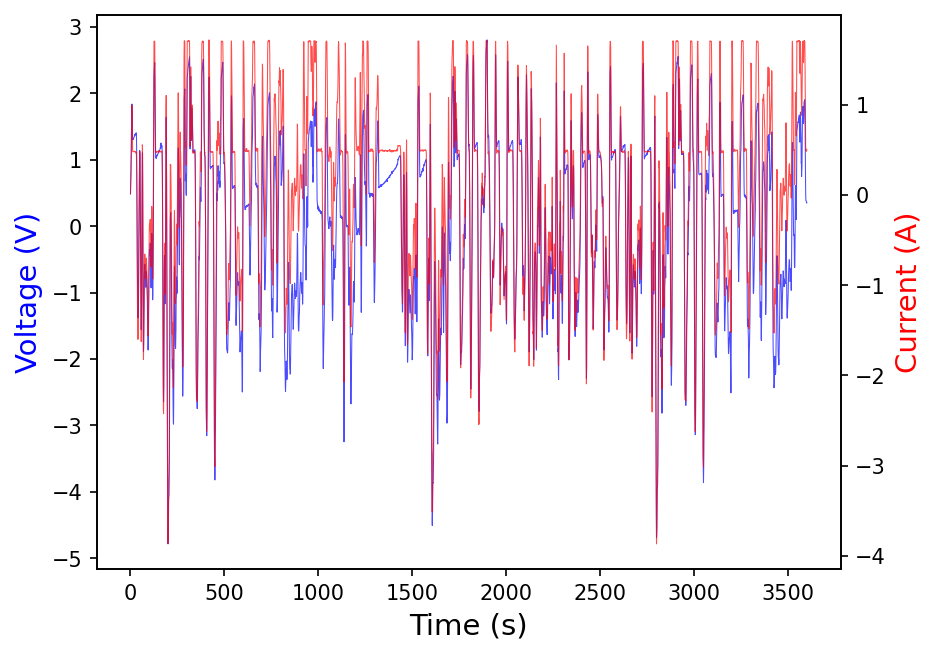

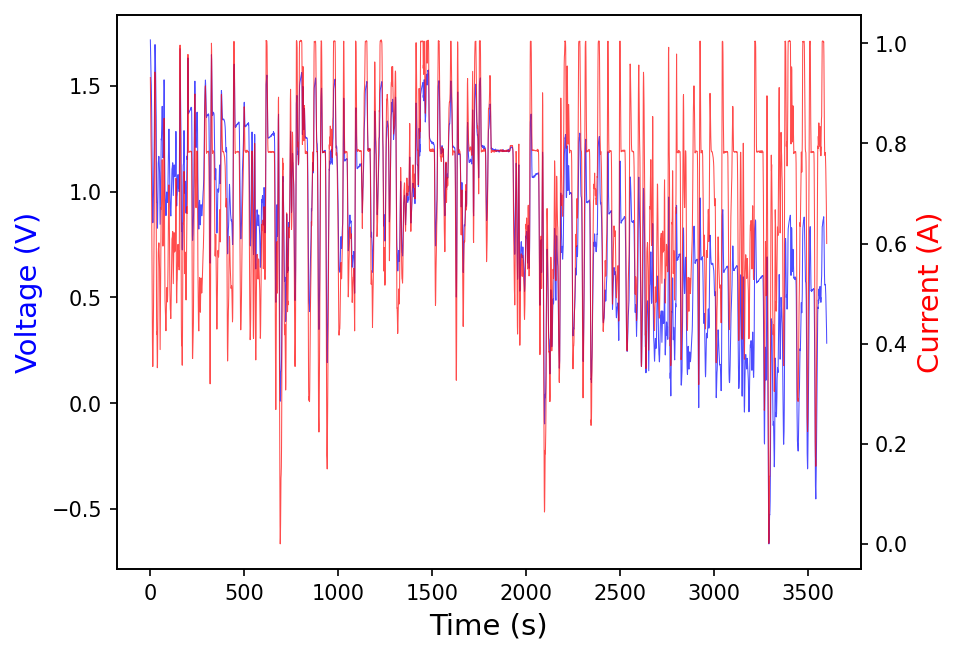

In [2]:
trn_data_filtered = load_Stanford_filtered_data(train=True)
trn_data_original = load_Stanford_data(train=True)
print('in filtered data, n_samples = %d, array shape of first sample = %s'%(len(trn_data_filtered), str(trn_data_filtered[0].shape)))
print('in original data, n_samples = %d, array shape of first sample = %s'%(len(trn_data_original), str(trn_data_original[0].shape)))
filtered_dataset = Stanford_Degradation_Dataset(trn_data_filtered)
original_dataset = Stanford_Degradation_Dataset(trn_data_original, filtering=False)
filtered_dataset.visualize(s_id=0, c_id=1, save=False)
original_dataset.visualize(s_id=0, c_id=1, save=False)